# **Part 2nd : RNN Sentiment Analysis Using RNN**
# **Akash Kesrwani**
## **About Dataset** 
**The Social Dilemma, a documentary-drama hybrid explores the dangerous human impact of social networking, with tech experts sounding the alarm on their own creations as the tech experts sound the alarm on the dangerous human impact of social networking. This dataset brings you the twitter responses made with the TheSocialDilemma hashtag after watching the eye-opening documentary "The Social Dilemma" released in an OTT platform(Netflix) on September 9th, 2020.You can categorize the tweets into different groups to identify the sentiment of the users regarding the documentary**<br>
**Attribute Information:**
1. `user_name` - The name of the user, as they’ve defined it.<BR>
2. `user_location` - The user-defined location for this account’s profile.<BR>
3. `user_description` - The user-defined UTF-8 string describing their account.<BR>
4. `user_created` - Time and date, when the account was created.<BR>
5. `user_followers` - The number of followers an account currently has.<BR>
6. `user_friends` – The number of friends an account currently has.<BR>
7. `user_favourites` - The number of favorites an account currently has.<BR>
8. `user_verified` - When true, indicates that the user has a verified account.<BR>
9. `date` - UTC time and date when the Tweet was created.<BR>
10. `hashtags` - All the other hashtags posted in the tweet along with<BR> #TheSocialDilemma<BR>
11. `source` - Utility used to post the Tweet, Tweets from the Twitter website have a source<BR>
value – web
12. `is_retweet` - Indicates whether this Tweet has been Retweeted by the authenticating user.<BR>
13. `clean_text` – Cleaned text of the tweet.<BR>
14. `Sentiment (target)` - Indicates the sentiment of the tweet, consists of three categories:
Positive, neutral, and negative.




In [69]:
!pip install tensorflow==2.4.1

In [70]:
# import libraries
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,LSTM , GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import  Embedding
from tensorflow.keras.models import Sequential
import tensorflow as tf
import itertools

import seaborn as sns
sns.set()

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
print("Tensorflow Version: {}".format(tf.__version__))

Tensorflow Version: 2.4.1


In [73]:
data_train=pd.read_csv("/content/drive/MyDrive/Deep Learning/Deep Learning Exam/dataset/tweets_train.csv")
data_test=pd.read_csv("/content/drive/MyDrive/Deep Learning/Deep Learning Exam/dataset/tweets_test.csv")

In [74]:
data_train.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
0,Romy 👑,Bolton - England,"Tables turn, bridges burn, you live and learn.",2009-06-15 09:00:39,525,896,3854,False,2020-09-19 15:19:32,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TLynn Peterson,"Black Canyon City, Arizona",Acquired disability ♿ after an accident. Livin...,2013-05-29 00:17:46,5045,5374,48152,False,2020-09-13 00:31:46,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma If we don t agree on what is ...,Positive
2,Rutger Kosters,Netherlands,Cloud Solution Architect @NetApp | VCDX #209 |...,2014-10-07 09:34:10,574,251,1070,False,2020-09-09 21:10:33,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma scary to see social ...,Negative
3,IDFWU🗯🇿🇼🇿🇦,"East London, South Africa","YOU HAVE OPTIONS, YOU CAN’T JUST TAKE WHAT LIF...",2012-08-22 11:09:06,706,618,1320,False,2020-09-11 04:33:08,NaN,Twitter for Android,False,You check your social media before you pee in ...,Positive
4,Treebel,NaN,NaN,2010-09-25 07:25:31,9,13,55,False,2020-09-17 16:27:38,['thesocialdilemma'],Twitter for iPhone,False,watch thesocialdilemma and see what s actually...,Negative


In [75]:
data_test.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text
0,Doug Webb,Probably Europe,"I develop methods for effective cooperation, w...",2015-12-12 15:22:58,157,228,496,False,2020-09-15 22:53:36,"['theSocialDilemma', 'joinMastodon']",Twitter Web App,False,Watch theSocialDilemma then joinMastodon
1,Dan Reynish,"Medicine Hat, Alberta",News Anchor at Noon and 5 pm on CHAT TV. Canad...,2011-09-10 12:17:10,1722,2500,13912,False,2020-09-12 04:43:03,['WeTheNorth'],Twitter Web App,False,With the 2019 2020 NBA season officially over ...
2,🌤,NaN,NaN,2011-06-01 02:23:57,880,585,205,False,2020-09-19 07:06:53,['TheSocialDilemma'],Twitter for iPhone,False,if you want to really know about people go tal...
3,“IT IS WHAT IT IS.”🇰🇪🇳🇿🇺🇸,WA,Heliophile🌞☀️• #Rugby • Wildlifer • #HIV • #So...,2009-04-17 13:35:02,1143,2692,11999,False,2020-09-12 18:28:18,"['TheSocialDilemma', 'Netflix']",Twitter for iPhone,False,Have you watched TheSocialDilemma on Netflix
4,Mahima Sood,NaN,Amy Dunne X Holly Golightly || Data Scientist ...,2018-01-26 21:57:22,18,65,263,False,2020-09-12 18:48:53,['TheSocialDilemma'],Twitter for iPhone,False,Highly recommend TheSocialDilemma on


In [76]:
data_train.shape

(17000, 14)

In [77]:
data_test.shape

(3068, 13)

In [78]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         16999 non-null  object
 1   user_location     13393 non-null  object
 2   user_description  15838 non-null  object
 3   user_created      17000 non-null  object
 4   user_followers    17000 non-null  int64 
 5   user_friends      17000 non-null  int64 
 6   user_favourites   17000 non-null  int64 
 7   user_verified     17000 non-null  bool  
 8   date              17000 non-null  object
 9   hashtags          13351 non-null  object
 10  source            17000 non-null  object
 11  is_retweet        17000 non-null  bool  
 12  clean_text        16992 non-null  object
 13  Sentiment         17000 non-null  object
dtypes: bool(2), int64(3), object(9)
memory usage: 1.6+ MB


In [79]:
#Here we just need two columns to make model so except variable gonna remove
data_train=data_train.drop(["user_name","user_location","user_description","user_created","user_followers","user_friends","user_favourites","user_verified","date",
                            "hashtags","source","is_retweet"],axis=1)


In [80]:
data_train.shape

(17000, 2)

In [81]:
data_train.head()

,clean_text,Sentiment
0,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TheSocialDilemma If we don t agree on what is ...,Positive
2,Watching TheSocialDilemma scary to see social ...,Negative
3,You check your social media before you pee in ...,Positive
4,watch thesocialdilemma and see what s actually...,Negative


In [82]:
data_train.isnull().sum()

clean_text    8
Sentiment     0
dtype: int64

In [83]:
data_train=data_train.dropna()

In [84]:
data_train.isnull().sum()

clean_text    0
Sentiment     0
dtype: int64

In [85]:
#Label Encoding and creating a new column
senti = {"Negative":0, "Neutral":1, "Positive":2}
data_train["label"]=data_train["Sentiment"].map(senti)

In [86]:
data_train.head()

,clean_text,Sentiment,label
0,TheSocialDilemma is an eye opener isn t it ple...,Neutral,1
1,TheSocialDilemma If we don t agree on what is ...,Positive,2
2,Watching TheSocialDilemma scary to see social ...,Negative,0
3,You check your social media before you pee in ...,Positive,2
4,watch thesocialdilemma and see what s actually...,Negative,0


In [87]:
data_train.shape

(16992, 3)

## **Spliting actual train data into train and test for testing purpose**

In [88]:
train_df=data_train.iloc[:13000]
test_df=data_train.iloc[13000:]

In [89]:
train_df.shape

(13000, 3)

In [90]:
test_df.shape

(3992, 3)

## **converting Training dataset into tensorflow dataset format**

In [91]:
# convert training dataset into tensorflow dataset format

train_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(train_df["clean_text"].values, tf.string),
            tf.cast(train_df['label'].values, tf.int32)
        )
    )
)

In [92]:
train_dataset

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int32)>

In [93]:
# Print few samples (first 3)
for sample, label in train_dataset.take(3):
    print('**'*50)
    print("Sample : ", sample.numpy())
    print()
    print("label : ", label.numpy())
    print('**'*50)

****************************************************************************************************
Sample :  b'TheSocialDilemma is an eye opener isn t it please ignore the irony of me tweeting about it'

label :  1
****************************************************************************************************
****************************************************************************************************
Sample :  b'TheSocialDilemma If we don t agree on what is true or that there is such a thing as truth we re toast This is'

label :  2
****************************************************************************************************
****************************************************************************************************
Sample :  b'Watching TheSocialDilemma scary to see social media is fucking up the mental health of Gen X'

label :  0
****************************************************************************************************


## **Creating Bactches of the dataset**

In [94]:
BUFFER_SIZE = 3000
BATCH_SIZE = 64

In [95]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# now every batch will have 64 samples

In [96]:
# printing first batch from train dataset

for Sample, label in train_dataset.take(1):
    print("Sample : ", Sample.numpy())
    print("-----------------------")
    print("label: ", label.numpy())
    print("-----------------------")
    print("total len: ", len(label.numpy()))

Sample :  [b'TheSocialDilemma got coolman out here questioning if coolman should exist that shit is scary yo I may need a break from this'
 b'Thank you Netflix and for releasing this critical'
 b'Lots worth thinking about in this statement False information makes the companies more money than the truth The'
 b'Just watched TheSocialDilemma on Netflix tonight Very good doc about the manipulation that happens on social netw'
 b'Nothing vast enters the life of mortals without a curse TheSocialDilemma'
 b'I understand the reasons but I can t agree that deleting our social media accounts or so is going to make things b'
 b'OurPact has been keeping kids safe online with over 1 2 million families because we a'
 b'Are you addicted to your phone Social Media Know someone who is THIS IS FOR THEM thesocialdilemma netflix'
 b'Bravo for producing TheSocialDilemma The film portrays the problem very well May be a sequel would be'
 b'Never watch a recommended video on YouTube always choose That s anot

## **Creating Training and validation split**

In [97]:
len(train_dataset)

204

In [98]:
# Create validation dataset
val_dataset = train_dataset.take(40)
train_dataset = train_dataset.skip(40)

## **Creating Text Encoder**

In [99]:
#The machine cannot understand words and thus to feed them to model we need to encode them. Textvectorization layer can be used for this.
# Create the  encode layer

VOCAB_SIZE = 2000 #length of bag of words
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens = VOCAB_SIZE)

# Apply it on train dataset
encoder.adapt(train_dataset.map(lambda text, label : text))

In [100]:
# Check the vocabulary

vocab = np.array(encoder.get_vocabulary())

vocab[0:30]

array(['', '[UNK]', 'thesocialdilemma', 'the', 'i', 'to', 'on', 'and',
       'you', 'a', 'is', 'it', 'social', 'watch', 'of', 'netflix', 's',
       'this', 'media', 'are', 'for', 'that', 'in', 'watching', 'we', 't',
       'if', 'watched', 'about', 'my'], dtype='<U22')

# **RNN MODEL**


In [101]:
# RNN model
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding, Flatten
model = Sequential([
                    encoder,
                    Embedding(input_dim = len(encoder.get_vocabulary()), output_dim = 64, mask_zero = True),
                    SimpleRNN(64),
                    Dense(64, activation="relu"),
                    Dense(3, activation="softmax")  # For 3 classes and softmax all classes will have total 1 
])

In [102]:
# Checking model with sample without training
sample_text = ("the documetary is eye-opening, one should not think much, just learn")
preds_check = model.predict(np.array([sample_text]))
print(preds_check)

[[0.33327353 0.3461648  0.32056168]]


# **Compiling The Model**

In [103]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = Adam(1e-4),
              metrics=['accuracy'])

In [104]:
EPOCHS = 30

h = model.fit(train_dataset, epochs=EPOCHS, validation_data=val_dataset)

Epoch 1/30
164/164 [==============================] - 5s 19ms/step - loss: 1.0719 - accuracy: 0.4183 - val_loss: 0.9735 - val_accuracy: 0.5758
Epoch 2/30
164/164 [==============================] - 3s 16ms/step - loss: 0.9504 - accuracy: 0.5825 - val_loss: 0.8514 - val_accuracy: 0.6348
Epoch 3/30
164/164 [==============================] - 3s 16ms/step - loss: 0.8100 - accuracy: 0.6601 - val_loss: 0.7344 - val_accuracy: 0.6941
Epoch 4/30
164/164 [==============================] - 3s 16ms/step - loss: 0.6864 - accuracy: 0.7232 - val_loss: 0.6236 - val_accuracy: 0.7504
Epoch 5/30
164/164 [==============================] - 3s 16ms/step - loss: 0.5666 - accuracy: 0.7791 - val_loss: 0.5334 - val_accuracy: 0.7918
Epoch 6/30
164/164 [==============================] - 3s 17ms/step - loss: 0.4734 - accuracy: 0.8290 - val_loss: 0.4383 - val_accuracy: 0.8449
Epoch 7/30
164/164 [==============================] - 3s 16ms/step - loss: 0.4012 - accuracy: 0.8606 - val_loss: 0.3858 - val_accuracy: 0.8695

# **Model Evalution**

In [110]:
test_df.head()

,clean_text,label
0,Has anyone watched TheSocialDilemma on Netflix...,1
1,Social media platforms like Twitter Facebook I...,2
2,That s it that s the tweet TheSocialDilemma,1
3,Powerful words by Justin Rosenstein former pro...,2
4,Try dopamine fasts Do Watch this documentary T...,1


In [111]:
#require columns clean_text and Label
test_df = test_df[["clean_text", "label"]].reset_index(drop=True)
print(test_df.head())
print(test_df.shape)

                                          clean_text  label
0  Has anyone watched TheSocialDilemma on Netflix...      1
1  Social media platforms like Twitter Facebook I...      2
2        That s it that s the tweet TheSocialDilemma      1
3  Powerful words by Justin Rosenstein former pro...      2
4  Try dopamine fasts Do Watch this documentary T...      1
(3992, 2)


In [112]:
# Convert into tensorflow dataset format as before
test_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(test_df["clean_text"].values, tf.string),
            tf.cast(test_df["label"].values, tf.int32)
        )
    )
)

# Create batches in test dataset with same Batch_size
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [113]:
#Print a sample batch
# Print a batch
for sample, label in test_dataset.take(1):
    print("Sample : ", Sample.numpy())
    print()
    print("label : ", label.numpy())
    print()
    print("Len :", len(label.numpy()))

Sample :  [b'TheSocialDilemma got coolman out here questioning if coolman should exist that shit is scary yo I may need a break from this'
 b'Thank you Netflix and for releasing this critical'
 b'Lots worth thinking about in this statement False information makes the companies more money than the truth The'
 b'Just watched TheSocialDilemma on Netflix tonight Very good doc about the manipulation that happens on social netw'
 b'Nothing vast enters the life of mortals without a curse TheSocialDilemma'
 b'I understand the reasons but I can t agree that deleting our social media accounts or so is going to make things b'
 b'OurPact has been keeping kids safe online with over 1 2 million families because we a'
 b'Are you addicted to your phone Social Media Know someone who is THIS IS FOR THEM thesocialdilemma netflix'
 b'Bravo for producing TheSocialDilemma The film portrays the problem very well May be a sequel would be'
 b'Never watch a recommended video on YouTube always choose That s anot

In [114]:
# EValuating model on test_dataset
test_loss, test_acc = model.evaluate(test_dataset)

63/63 [==============================] - 0s 5ms/step - loss: 0.6960 - accuracy: 0.8505


In [115]:
#Print loss and accuracy

print("The test loss is : {}".format(test_loss))
print("The test accuracy is : {}".format(test_acc))

The test loss is : 0.6960147619247437
The test accuracy is : 0.850450873374939


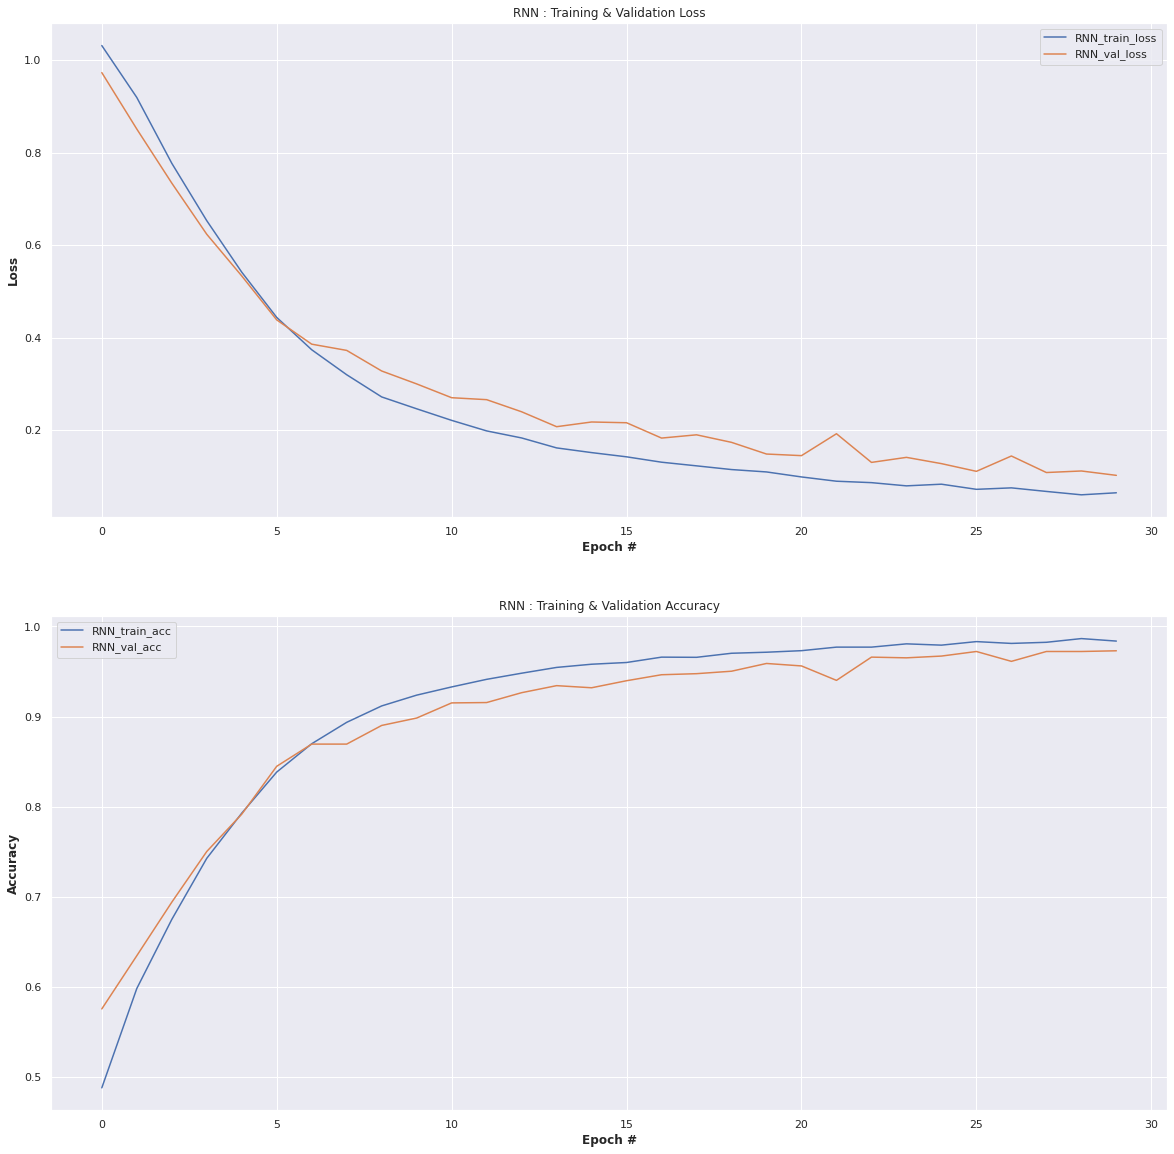

In [116]:
# Plot the Training and Validation Accuracy and Loss for our RNN model
N = np.arange(0, EPOCHS)

fig, ax = plt.subplots(2,1, figsize = [20,20])
ax = ax.ravel()

ax[0].plot(N, h.history["loss"], label = "RNN_train_loss")
ax[0].plot(N, h.history["val_loss"], label = "RNN_val_loss")
ax[0].set_title("RNN : Training & Validation Loss")
ax[0].set_xlabel("Epoch #", weight = "bold")
ax[0].set_ylabel("Loss", weight = "bold")
ax[0].legend()

ax[1].plot(N, h.history["accuracy"], label = "RNN_train_acc")
ax[1].plot(N, h.history["val_accuracy"], label = "RNN_val_acc")
ax[1].set_title("RNN : Training & Validation Accuracy")
ax[1].set_xlabel("Epoch #", weight = "bold")
ax[1].set_ylabel("Accuracy", weight = "bold")
ax[1].legend()

plt.subplots_adjust(wspace=0.2, hspace=0.2)

We can see the curves are very smooth and converging. <br>Our model is pretty well-trained and no over-fitting and over-training.

In [117]:
# Making predictions on df_test
preds = model.predict(np.array(test_df["clean_text"]))
preds[0:10]

array([[5.1979274e-02, 8.6984736e-01, 7.8173384e-02],
       [1.6631022e-05, 4.0423267e-05, 9.9994290e-01],
       [9.4406161e-04, 9.9889767e-01, 1.5820545e-04],
       [1.5085046e-04, 2.6532975e-03, 9.9719584e-01],
       [6.4213299e-03, 9.9202347e-01, 1.5552123e-03],
       [9.9835396e-01, 1.7945416e-04, 1.4665513e-03],
       [4.6568294e-04, 9.9913269e-01, 4.0166266e-04],
       [6.5002305e-04, 9.9812597e-01, 1.2239596e-03],
       [8.0262627e-03, 1.4848174e-01, 8.4349197e-01],
       [9.5121734e-02, 1.8691771e-02, 8.8618654e-01]], dtype=float32)

In [121]:
preds_prob=model.predict_proba(np.array(test_df["clean_text"]))

In [122]:
preds_prob[0:10]

array([[5.1979274e-02, 8.6984736e-01, 7.8173384e-02],
       [1.6631022e-05, 4.0423267e-05, 9.9994290e-01],
       [9.4406161e-04, 9.9889767e-01, 1.5820545e-04],
       [1.5085046e-04, 2.6532975e-03, 9.9719584e-01],
       [6.4213299e-03, 9.9202347e-01, 1.5552123e-03],
       [9.9835396e-01, 1.7945416e-04, 1.4665513e-03],
       [4.6568294e-04, 9.9913269e-01, 4.0166266e-04],
       [6.5002305e-04, 9.9812597e-01, 1.2239596e-03],
       [8.0262627e-03, 1.4848174e-01, 8.4349197e-01],
       [9.5121734e-02, 1.8691771e-02, 8.8618654e-01]], dtype=float32)

In [119]:
np.array(test_df["clean_text"][3991])

array('had the impression that is actually sitting in a jail cell in TheSocialDilemma telling us discomfo',
      dtype='<U98')

In [123]:
# we need to get label for prediction from probabailities
pred = []
for i in range(len(preds_prob)):
    index = preds_prob[i].argmax()
    pred.append(index)

pred[0:10]

[1, 2, 1, 2, 1, 0, 1, 1, 2, 2]

In [125]:
test_df["Pred"] = pred
test_df.head()

,clean_text,label,Pred
0,Has anyone watched TheSocialDilemma on Netflix...,1,1
1,Social media platforms like Twitter Facebook I...,2,2
2,That s it that s the tweet TheSocialDilemma,1,1
3,Powerful words by Justin Rosenstein former pro...,2,2
4,Try dopamine fasts Do Watch this documentary T...,1,1


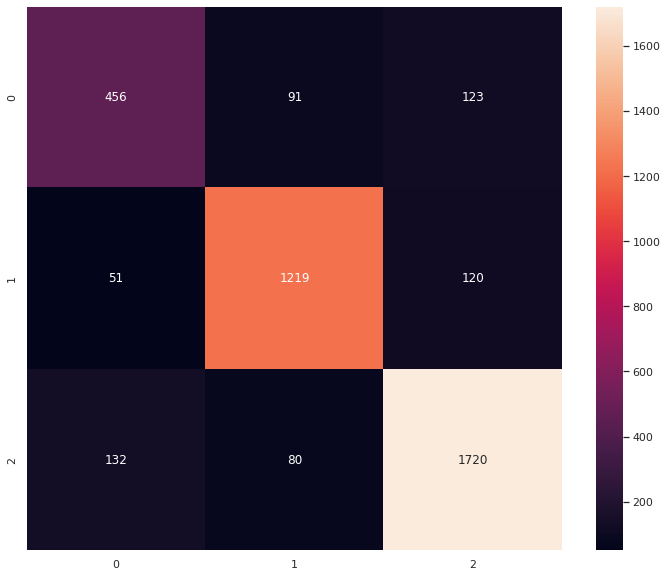

In [127]:
cm = confusion_matrix(test_df["label"], test_df["Pred"])
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d')

In [129]:
# Classification Report
print("Classification Report of RNN")
print(classification_report(test_df["label"], test_df["Pred"]))

Classification Report of RNN
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       670
           1       0.88      0.88      0.88      1390
           2       0.88      0.89      0.88      1932

    accuracy                           0.85      3992
   macro avg       0.82      0.82      0.82      3992
weighted avg       0.85      0.85      0.85      3992



In [132]:
# Model Accuracy
acc=accuracy_score(test_df["label"], test_df["Pred"])
print("The accuracy of the RNN model : {:.2f} % ".format(acc*100))

The accuracy of the RNN model : 85.05 % 


# **PREDICTION ON TEST DATA**

In [133]:
data_test.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text
0,Doug Webb,Probably Europe,"I develop methods for effective cooperation, w...",2015-12-12 15:22:58,157,228,496,False,2020-09-15 22:53:36,"['theSocialDilemma', 'joinMastodon']",Twitter Web App,False,Watch theSocialDilemma then joinMastodon
1,Dan Reynish,"Medicine Hat, Alberta",News Anchor at Noon and 5 pm on CHAT TV. Canad...,2011-09-10 12:17:10,1722,2500,13912,False,2020-09-12 04:43:03,['WeTheNorth'],Twitter Web App,False,With the 2019 2020 NBA season officially over ...
2,🌤,NaN,NaN,2011-06-01 02:23:57,880,585,205,False,2020-09-19 07:06:53,['TheSocialDilemma'],Twitter for iPhone,False,if you want to really know about people go tal...
3,“IT IS WHAT IT IS.”🇰🇪🇳🇿🇺🇸,WA,Heliophile🌞☀️• #Rugby • Wildlifer • #HIV • #So...,2009-04-17 13:35:02,1143,2692,11999,False,2020-09-12 18:28:18,"['TheSocialDilemma', 'Netflix']",Twitter for iPhone,False,Have you watched TheSocialDilemma on Netflix
4,Mahima Sood,NaN,Amy Dunne X Holly Golightly || Data Scientist ...,2018-01-26 21:57:22,18,65,263,False,2020-09-12 18:48:53,['TheSocialDilemma'],Twitter for iPhone,False,Highly recommend TheSocialDilemma on


In [134]:
data_test=data_test.drop(["user_name","user_location","user_description","user_created","user_followers","user_friends","user_favourites","user_verified","date",
                            "hashtags","source","is_retweet"],axis=1)

In [135]:
data_test.shape

(3068, 1)

In [136]:
data_test.isnull().sum()

clean_text    1
dtype: int64

In [137]:
data_test.clean_text = data_test.clean_text.fillna('Null') 
data_test.isnull().sum()

clean_text    0
dtype: int64

## **Making Prediction**

In [138]:

# Making predictions on test_data
probs = model.predict(np.array(data_test["clean_text"]))
probs[0:10]

array([[3.8636243e-03, 9.8764658e-01, 8.4898053e-03],
       [1.9748926e-05, 9.9864227e-01, 1.3380040e-03],
       [6.4769465e-01, 8.7711291e-04, 3.5142830e-01],
       [2.1332607e-03, 9.9582112e-01, 2.0456433e-03],
       [3.1598741e-03, 3.6735393e-03, 9.9316663e-01],
       [2.9549707e-02, 5.3399163e-03, 9.6511036e-01],
       [5.1889474e-05, 9.8359686e-01, 1.6351169e-02],
       [3.8128546e-03, 9.9617577e-01, 1.1391334e-05],
       [2.0504270e-04, 6.5365963e-04, 9.9914122e-01],
       [5.3046718e-03, 6.8639931e-03, 9.8783129e-01]], dtype=float32)

In [139]:
# we need to get label for prediction from probabailities
Sentiment = []
classes=["Negative","Neutral","Positive"]
for i in range(len(probs)):
    index = probs[i].argmax()
    sent = classes[index]
    Sentiment.append(sent)
    
Sentiment[:10]

['Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive']

In [140]:
# Add Sentiment column to our original datasheet
data_test["Sentiment"] = Sentiment
data_test.head()

,clean_text,Sentiment
0,Watch theSocialDilemma then joinMastodon,Neutral
1,With the 2019 2020 NBA season officially over ...,Neutral
2,if you want to really know about people go tal...,Negative
3,Have you watched TheSocialDilemma on Netflix,Neutral
4,Highly recommend TheSocialDilemma on,Positive


In [141]:
# Save the file 
data_test.to_csv('tweets_test_submission1.csv')